<a href="https://colab.research.google.com/github/rodrigoviannini/Machine-Learning/blob/main/Previs%C3%A3o_de_transa%C3%A7%C3%B5es_fraudulentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando Bibliotecas necessarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Passos:
* Objetivos
* Compreensão de dados
* Preparação de dados
* Modelagem

# Objetivos
Criar um modelo para prever transações fraudulentas com base no conjunto de dados fornecido.

# Legenda do Dataset



*  step = mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

---------------------------------------------------------------------
*   tipo | type = CASH-IN, CASH-OUT, DÉBITO, PAGAMENTO e TRANSFERÊNCIA. | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

----------------------------------------------------------------------
*   valor | amount = valor da transação em moeda local.

----------------------------------------------------------------------
*   nameOrig - cliente que iniciou a transação.

----------------------------------------------------------------------
*   oldbalanceOrg - saldo inicial antes da transação.

----------------------------------------------------------------------
*   newbalanceOrig - novo saldo após a transação.

----------------------------------------------------------------------
*   nameDest - cliente que é o destinatário da transação.

----------------------------------------------------------------------
*   oldbalanceDest - destinatário do saldo inicial antes da transação. Observe que não há informações para clientes que começam com M (Comerciantes).

----------------------------------------------------------------------
*   newbalanceDest - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

----------------------------------------------------------------------
*   isFraud - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

----------------------------------------------------------------------
*   isFlaggedFraud - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.

----------------------------------------------------------------------



In [ ]:
# Lendo CSV de Fraude baixado do Kaggle
fraud = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto de estudo/Arquivos CSV utilizados/Fraud.csv')

In [ ]:
# Verificando o tamanho do dataset
fraud.shape

(6362620, 11)

In [ ]:
# Verificando os dados
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Estatistica dos atributos
fraud.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
# Verificando se existem valores nulos inseridos nos dados
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#isFlaggeddraud transações
fraud[fraud['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
# Verificando que os dados estão desbalanceados.
fraud["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
# Mais de 90% dos dados não são fraudes
fraud["isFraud"].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [ ]:
# Verificando o tipo de pagamento das transações
fraud["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# Vizualizações dos dados em forma de graficos.

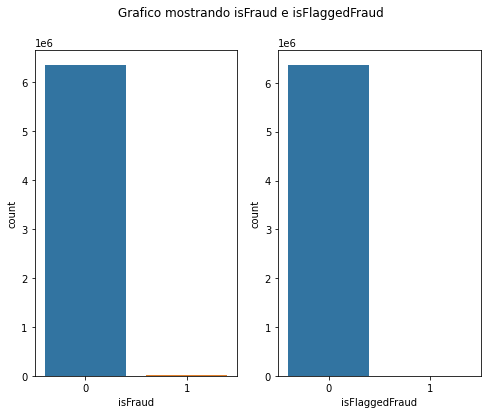

In [ ]:
# Gráfico de classe de destino
plt.figure(figsize=(8,6))

plt.subplot(121)
ax = sns.countplot(data=fraud,x='isFraud')

plt.subplot(122)
ax = sns.countplot(data=fraud,x='isFlaggedFraud')

plt.suptitle('Grafico mostrando isFraud e isFlaggedFraud')
plt.show()

* Este é um conjunto de dados desequilibrado
* Parece apenas 16 transações rotuladas como 'isFlaggedFraud'

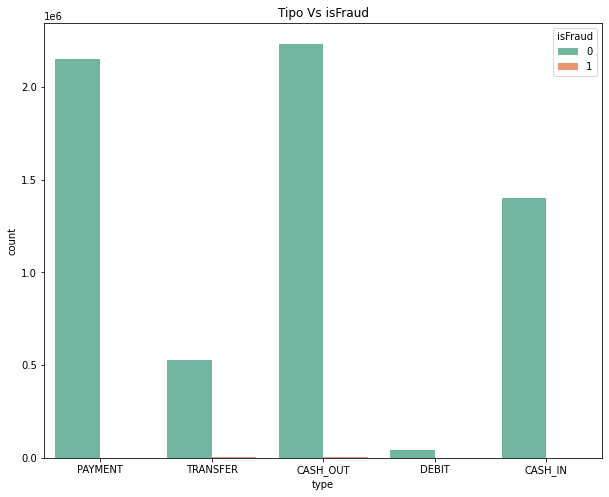

In [ ]:
# Contando o número de transações por tipo
plt.figure(figsize=(10,8))
sns.countplot(x="type", data=fraud,hue="isFraud" , palette="Set2")
plt.title('Tipo Vs isFraud');
# Estamos habilitados a analisar as transações de fraude, pois temos mais transações não fraudulentas do que transações fraudulentas.

* Transações de transferência e saque parecem fraude
* Apenas as transações de transferência são feitas 'isFlaggedFraud'

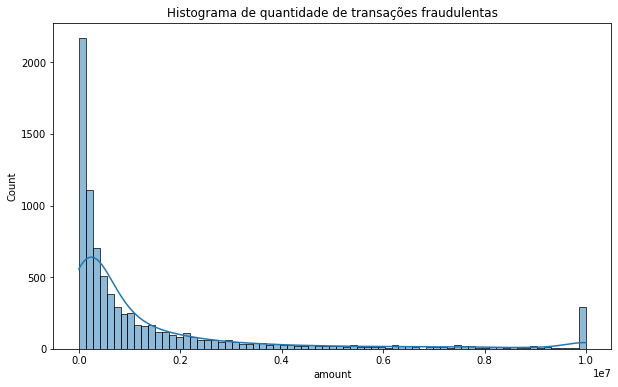

In [ ]:
# Histograma de recurso de valor baseado em fraude
plt.figure(figsize=(10,6))
sns.histplot(data=fraud[fraud['isFraud']==1],x='amount',kde=True)
plt.title('Histograma de quantidade de transações fraudulentas')
plt.show()

* A distribuição é positivamente assimétrica
* A maioria das transações está abaixo do valor de 200.000

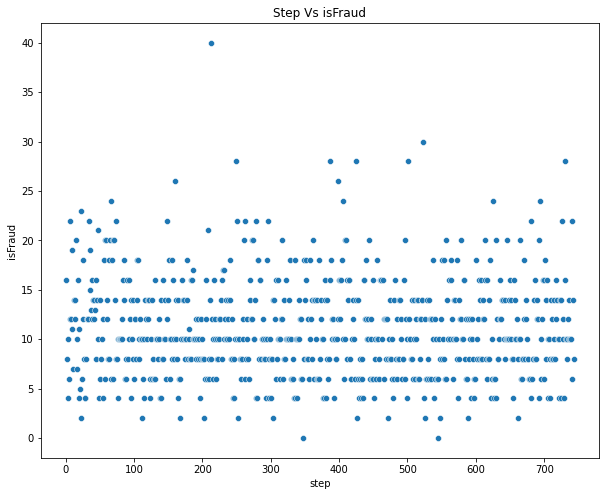

In [ ]:
step_group = fraud.groupby('step').sum().reset_index()
plt.figure(figsize=(10,8))
sns.scatterplot(data=step_group,x='step',y='isFraud')
plt.title('Step Vs isFraud')
plt.show()

* Parece não existir relação entre tempo e transações fraudulentas.

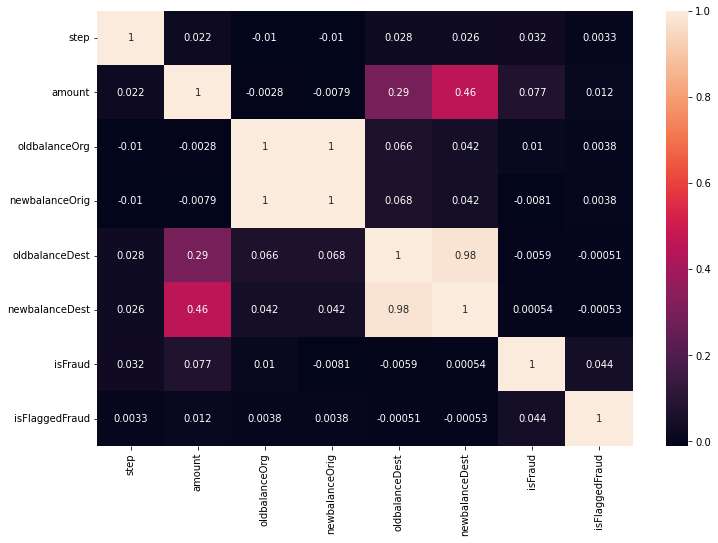

In [ ]:
# Criando um "mapa de calor" entre as variaveis e a variavel alvo
plt.figure(figsize=(12,8))
sns.heatmap(fraud.corr(), annot=True)

# Preparação dos dados

In [ ]:
# Importação do modulo da biblioteca para preparação dos dados.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Obtendo dummies para recurso de tipo para conversão.
type_dummies = pd.get_dummies(fraud['type'],prefix='type',drop_first=True)

In [ ]:
# Adicionando dummies e removendo tipo.
fraud_copy = pd.concat([fraud.drop('type',axis=1),type_dummies],axis=1)

In [ ]:
# Dividindo recursos e alvo | Splitando as Targets
X = fraud_copy.drop(['isFraud','nameOrig','nameDest'],axis=1)
y = fraud_copy['isFraud']

In [ ]:
# Dividindo os dados em Treino e teste | Splitando os dados
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=50)

* Usado estratificar, para manter a proporção da amostra alvo como os dados

In [ ]:
# Colunas para escala
colu_escala = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
# Scaler
scaler = MinMaxScaler().fit(X_train[colu_escala])

In [ ]:
# Treinando o x_treino e o x_teste
X_train[colu_escala] = scaler.transform(X_train[colu_escala])
X_test[colu_escala] = scaler.transform(X_test[colu_escala])

# Modelando


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from warnings import simplefilter

simplefilter("ignore")

In [ ]:
# Modelo classificador XGB
xgbc = XGBClassifier(random_state=50)

In [ ]:
# Treinando o modelo
xgbc.fit(X_train,y_train)

[19:00:06] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(random_state=50)

In [ ]:
# Previsões sobre dados de teste
y_pred = xgbc.predict(X_test)

In [ ]:
#Classification Report
print(f'Classification Report of XGB Classifier: \n\n{classification_report(y_test,y_pred)}')

Classification Report of XGB Classifier: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.70      0.82      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



Como podemos ver nos resultados acima temos uma precisão de 99% de acerto no modelo.